In [149]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [150]:
dataframe = pd.read_excel(r"PS1_Q1_Data - Pandas.xls")

In [151]:
dataframe.head()

,Time,Occ (%),Flow (vph)
0,14:00:00,7.7,1867.0
1,14:05:00,7.7,1824.0
2,14:10:00,7.9,1836.0
3,14:15:00,8.6,2112.0
4,14:20:00,8.6,2040.0


In [152]:
dataframe['Time'] = pd.to_datetime(dataframe['Time'], format = '%H:%M:%S')

In [153]:
dataframe.head()

,Time,Occ (%),Flow (vph)
0,1900-01-01 14:00:00,7.7,1867.0
1,1900-01-01 14:05:00,7.7,1824.0
2,1900-01-01 14:10:00,7.9,1836.0
3,1900-01-01 14:15:00,8.6,2112.0
4,1900-01-01 14:20:00,8.6,2040.0


## Part 1 Error Checking

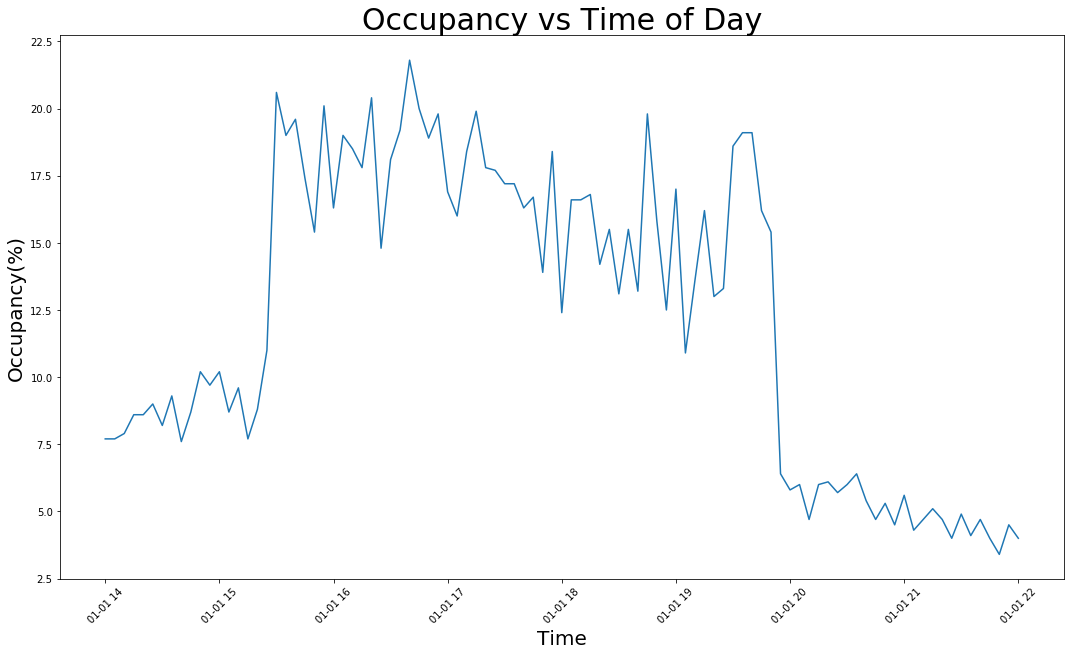

In [154]:
fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Occ (%)'] )

ax.set_title('Occupancy vs Time of Day',size = 30)

ax.set_ylabel('Occupancy(%)', size = 20)
ax.set_xlabel('Time', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)
plt.show()

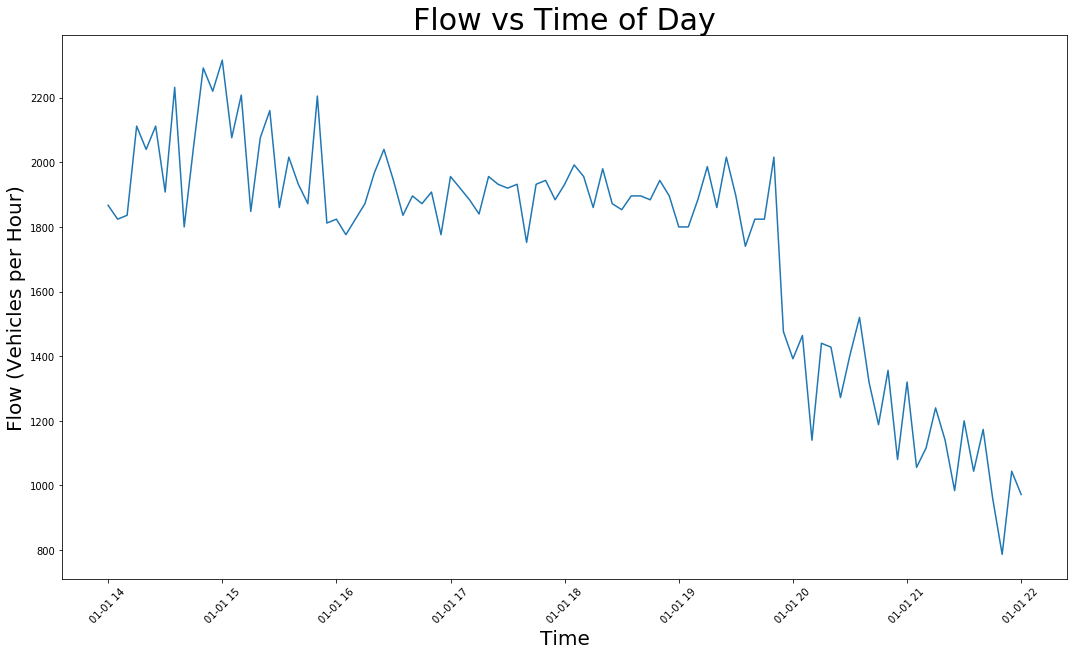

In [155]:
fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Flow (vph)'] )

ax.set_title('Flow vs Time of Day', size = 30)

ax.set_ylabel('Flow (Vehicles per Hour)', size = 20)
ax.set_xlabel('Time', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)
plt.show()

## Part 2: Calculate the speed from the flow and occupancy data. Clearly state your assumptions

### Speed = flow *g-factor/occupancy 
#### g-factor = mean Effective Vehicle Length
#### Effective Vehicle Length  = Vehicle Length + Detector length
#### Assumption: Effective Vehicle Length =  23.5 feet 

In [159]:
dataframe['Speed (mph)'] = 23.5 * dataframe['Flow (vph)'] / (dataframe['Occ (%)'] /60) / 5280 

In [160]:
dataframe.head()

,Time,Occ (%),Flow (vph),Speed (mph)
0,1900-01-01 14:00:00,7.7,1867.0,64.749852
1,1900-01-01 14:05:00,7.7,1824.0,63.258560
2,1900-01-01 14:10:00,7.9,1836.0,62.062716
3,1900-01-01 14:15:00,8.6,2112.0,65.581395
4,1900-01-01 14:20:00,8.6,2040.0,63.345666


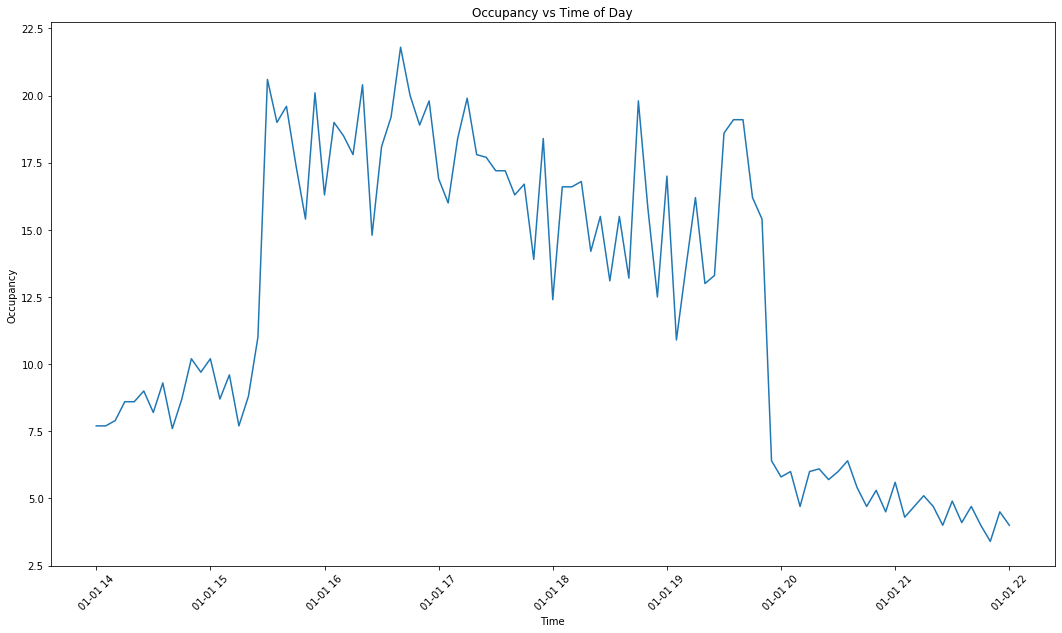

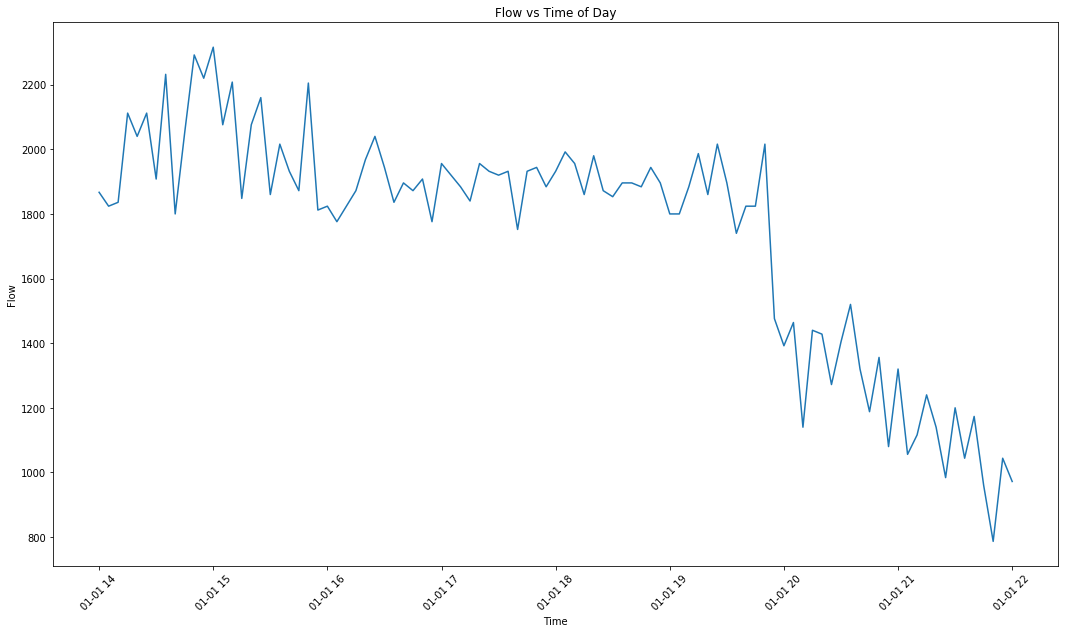

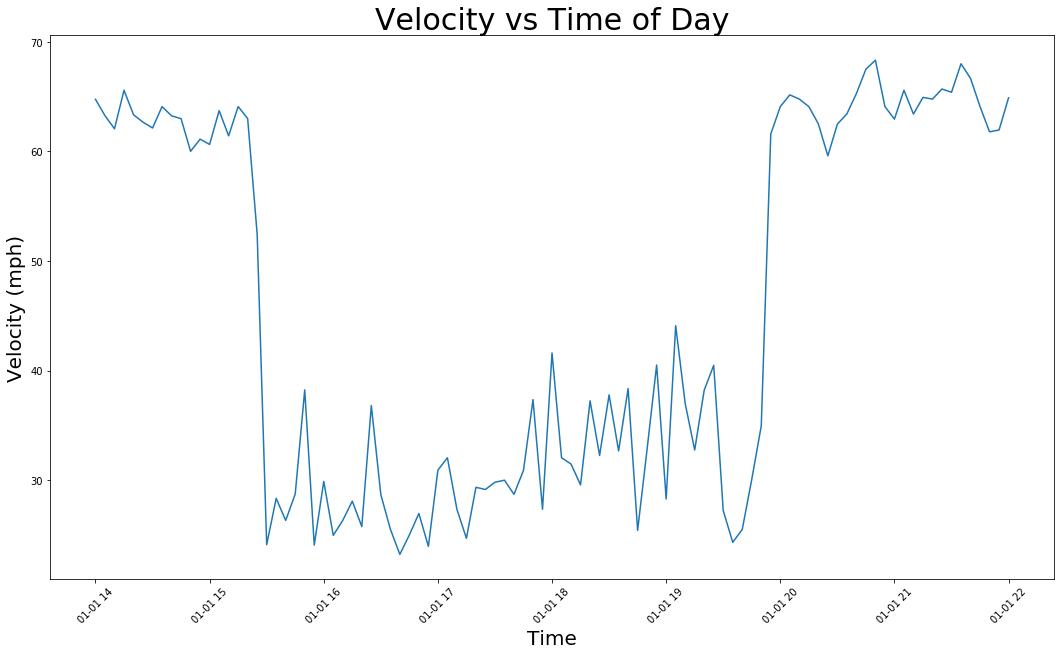

In [161]:
fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Occ (%)'] )

ax.set_title('Occupancy vs Time of Day')

ax.set_ylabel('Occupancy')
ax.set_xlabel('Time')
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)


fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Flow (vph)'] )

ax.set_title('Flow vs Time of Day')

ax.set_ylabel('Flow')
ax.set_xlabel('Time')
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Speed (mph)'] )

ax.set_title('Velocity vs Time of Day', size = 30)

ax.set_ylabel('Velocity (mph)', size = 20)
ax.set_xlabel('Time', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()

## B. Delay Estimation
### The detector is located approximately in the middle of a 1 mile freeway segment. Calculate the
### delay to the traffic stream in (veh-hrs):
#### a) Define delay: Time Spent at Speeds < 35 mph
#### Delay = (time velocity < 35 mph) * (# of vehicles passing when velocity < 35 mph)
#### Delay = (time velocity < 35 mph) * (Flow(Five minutes) * 5/60 hr) = (Veh hrs)
#### b) Calculate the delay (in veh-hrs) based on your definition

In [162]:
def find_delay(df):
    if df['Speed (mph)'] >= 60:
        
        df['Delay'] = 0
        
    else:
        # Five minutes * number of vehicles
        df['Delay'] = (1/60 - 1/dataframe['Speed (mph)'])* dataframe['Flow (vph)'] # Check This
    return df

dataframe = dataframe.apply(find_delay, axis = 1)

In [163]:
dataframe

,Time,Occ (%),Flow (vph),Speed (mph),Delay
0,1900-01-01 14:00:00,7.7,1867.00,64.749852,0
1,1900-01-01 14:05:00,7.7,1824.00,63.258560,0
2,1900-01-01 14:10:00,7.9,1836.00,62.062716,0
3,1900-01-01 14:15:00,8.6,2112.00,65.581395,0
4,1900-01-01 14:20:00,8.6,2040.00,63.345666,0
5,1900-01-01 14:25:00,9.0,2112.00,62.666667,0
6,1900-01-01 14:30:00,8.2,1908.00,62.136918,0
7,1900-01-01 14:35:00,9.3,2232.00,64.090909,0
8,1900-01-01 14:40:00,7.6,1800.00,63.247608,0
9,1900-01-01 14:45:00,8.7,2052.00,62.985893,0


In [164]:
delay = []
for i in range(len(dataframe.index)):
    if dataframe['Speed (mph)'][i] > 35:
        delay.append(0)
    else:
        delay.append((-1/35 + 1/dataframe['Speed (mph)'][i])* dataframe['Flow (vph)'][i])

In [165]:
dataframe['Delay'] = delay

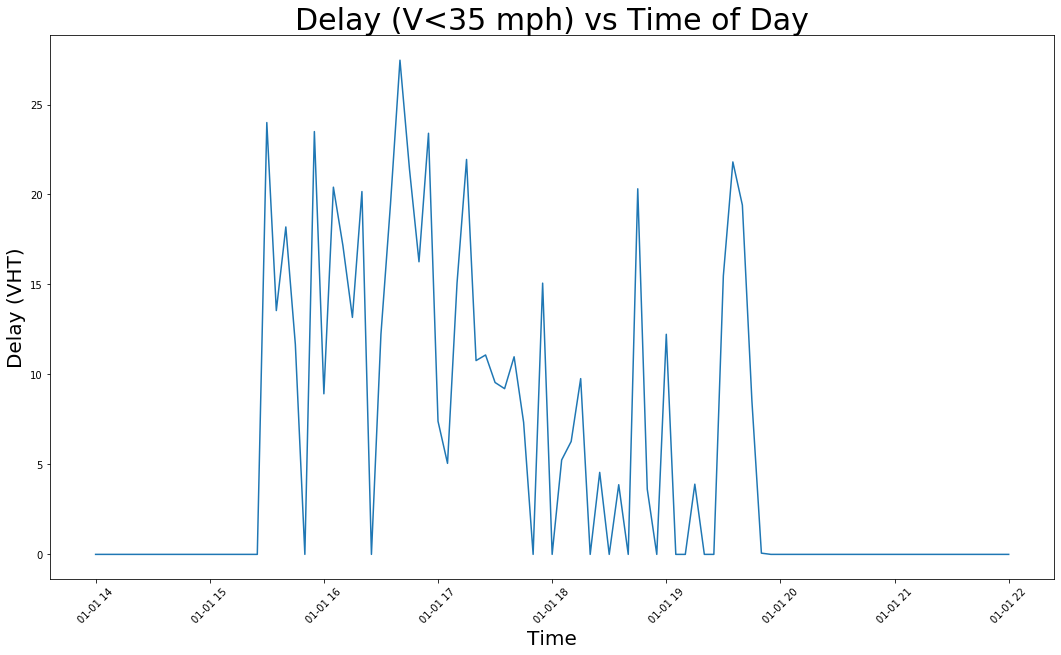

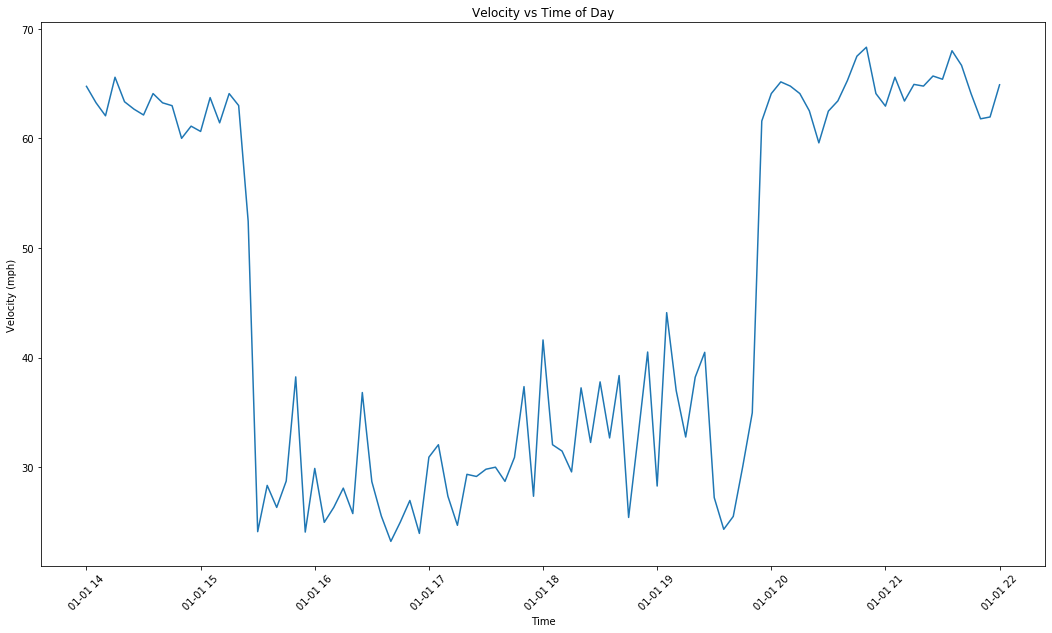

In [166]:
fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Delay'] )

ax.set_title('Delay (V<35 mph) vs Time of Day', size = 30)

ax.set_ylabel('Delay (VHT)', size = 20)
ax.set_xlabel('Time', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

fig, ax = plt.subplots()

plt.plot(dataframe['Time'] , dataframe['Speed (mph)'] )

ax.set_title('Velocity vs Time of Day')

ax.set_ylabel('Velocity (mph)')
ax.set_xlabel('Time')
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()

In [167]:
delay_veh_hrs = dataframe['Delay'].sum()

In [168]:
delay_veh_hrs

549.5310091185411